## Chapter 2: Zero order methods

# 2.3  Global Optimization Methods

In this Section we describe the first approach one might take to approximately minimize an arbitrary function: evaluate the function using a large number of input points and treat the input that provides the lowest function value as the approximate global minimum of the function.  This idea mimics how we as humans might find the approximate minimum of a function 'by eye' - i.e., by drawing it and visually identifying its lowest point.  While easy to implement and perfectly adequate for functions having low-dimensional input, this naturally zero-order framework fails miserably when the input dimension of a function grows to even moderate size.  This happens essentially for the same reason our ability to visually identify an approximate minimum of a function fails once the input size is greater than 2 or 3: the number of inputs to examine simply becomes infeasible.

In [3]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

# This is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# center all images in notebook and associated html
from IPython.display import HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
    width="340";
    height="340";
}
</style>
"""))

##   Choosing input points

To determine the smallest point of a function taking in one or two inputs we - as humans - can simply draw the function and determine 'by eye' where the smallest point lies.  We can  mimic this visual approach by simply evaluating a function over a large number of its input points and designating the input that provides the smallest result as our approximate global minimum.  This approach is called a *global optimization method*.  

How do we choose the inputs to try out with a generic function?  We clearly cannot try them all - even for a single-input function - since there are (technically speaking) an infinite number of points to try for any continuous function.  So - as one might guess - we can take two approaches to choosing our (finite) set of input points to test: we can sample them *uniformly* over an evenly spaced grid, or pick the same number of input points at random.  We illustrate both choices in the example below.

#### <span style="color:#a50e3e;">Example 1. </span> Evaluating a quadratic to determine its minimum

Here we illustrate two sampling methods for finding the global minimum of simple 2-d and 3-d quadratic functions

\begin{array}
\
g(w) = w^2 + 0.2\\
g(w_1,w_2) = w_1^2 + w_2^2 + 0.2
\end{array}

The former has global minimum at $w = 0$, and the latter at $\mathbf{w} =\begin{bmatrix} w_1 \\ w_2  \end{bmatrix} =  \begin{bmatrix} 0 \\ 0  \end{bmatrix}$.  In the top two panels we illustrate how to *evenly sample* the input of each function - taking 4 points for the 2-d function and 16 (to make a $4\times 4$ grid) for the 3-d version - at even increments (shown in blue).  The corresponding evaluations are then shown in green on the functions themselves.  

In the bottom two panels we randomly sample (uniformly at random on the interval $[-1,1]$ in each input axis) the same number of input points - 4 points for the 2-d function and 16 for the 3-d version.  Again the input points themselves are shown in blue, with the corresponding evaluations shown in green. 

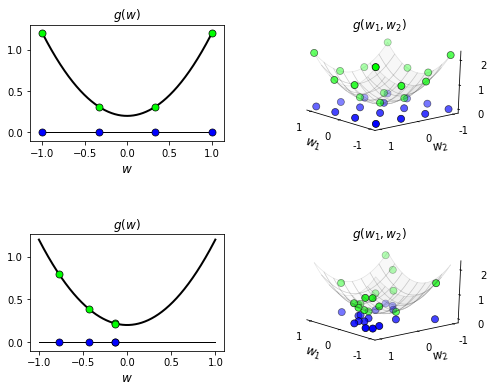

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# define function
func = lambda w: np.dot((w-0).T,(w-0)) + 0.2
num_samples = 4
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

We can see in the 2-d version in the bottom left panel that by randomly sampling we were able to - by chance - achieve a slightly lower point than when sampling the function evenly.  This is often the case, as often by sampling input points randomly we have a better chance of stumbling onto a point closer to a global minimum than when sample uniformly across the space.   

But in either case using enough samples we could certainly find an input very close to the true global minimum of either function.  For example if we run this experiment again using 20 samples for the 2-d quadratic, and 400 samples for the 3-d quadratic (so that we are sampling with a $20\times 20$ grid in the case of even sampling), using either approach we are able to find either the global minimum or a point very close to it.

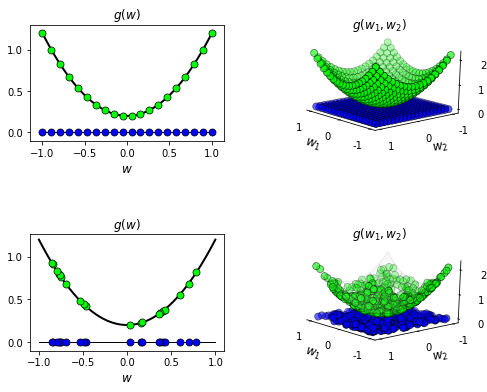

In [3]:
# This code cell will not be shown in the HTML version of this notebook
# define function
func = lambda w: np.dot(w.T,w) + 0.2
num_samples = 20
view = [20,140]

# plot 2d and 3d version, with even grid and randomly selected points
optlib.random_method_experiments.double_plot(func,num_samples,view = view)

---

Notice with global optimization we really are employing the simple zero-order optimality condition, from a set of $K$ chosen inputs $\left\{\mathbf{w}^k \right\}_{k=1}^K$ we are choosing the one input $\mathbf{w}^{j}$ lowest on the cost function 

\begin{equation}
g\left(\mathbf{w}^{j}\right) \leq g\left(\mathbf{w}^{k}\right) \,\,\,\,\,\,\,\,\, k=1,...,K
\end{equation}

which is indeed an approximation to the zero-order optimality condition discussed in the previous Section.

##  The curse of dimensionality and the failure of global optimization

While this sort of zero-order evaluation works fine for low-dimensional functions, regardless of how the input points are chosen, it fails quickly as we try to tackle functions of larger dimensional input.  This makes them essentially unusable in modern machine learning / deep learning since the functions we often deal with have input dimensions ranging from the hundreds to the hundreds of millions.  

To get a sense of why the global approach quickly becomes infeasible imagine we use an even sampling of points across the input space of a single-input function, choosing (for the sake of argument) $3$ points that are precisely a distance $d$ from one another  (this is illustrated in the left panel of the figure below). Imagine now that the input space of the function increases by one and that the range of each input is precisely that of the original single input function (as illustrated in the middle panel below).  We still aim to cover the space evenly and with enough samples such that each input we evaluate is once again a distance of $d$ from its closest neighbors.  However now in order to do this in two-dimensional space we need to sample $3^2 = 9$ input points.  Likewise if we increase the dimension of the input once again in the same fashion, in order to sample evenly across the input space so that each input is a maximum distance of $d$ from its neighbors we will need $3^3 = 27$ input points (as illustrated in the right panel below).  More generally - if we continue this thought experiment - for a general $N$ dimensional input we would need to sample $3^N$ number of points - a huge number even for moderate sized $N$.  This is an example of the so-called *curse of dimensionality* which - generally speaking - describes the exponential difficulty one encounters when trying to deal with functions of increasing input dimension.

<figure>
<img src= "../../mlrefined_images/math_optimization_images/curse_1.png" width="75%" height="100%"/>
  <figcaption>   
<strong>Figure 1:</strong> <em> The number of input points we must sample uniformly if we wish each to be a distance of $d$ from its neighbors grows exponentially as the input dimension of a function increases.  Here in the left panel we show a generic single dimensional input space, where $3$ points are required to evenly cover the input space in this way.  In the middle panel we can see that in $N=2$ dimensional space to get the same coverage we need $3^2 = 9$ points, and in the right panel in $N=3$ points we need $3^3 = 27$ points.  In general - in this prototypical example - we would need $3^N$ input points evenly spaced in order for each to be a distance of $d$ apart from one another.  This is an instance of the so-called *curse of dimensionality*.
</em>  </figcaption> 
</figure>

This issue is not ameliorated if we take samples randomly, as illustrated in the Figure below using the same hypothetical scenario.  To see why this is the case lets suppose now that - instead of fixing $d$ the distance of each input point sampled from its neighbors - we fix the the total number of randomly sample points to a fixed value.  In the figure below we use $10$ points, and look at how well they tend to distribute over an input space as we increase its dimension.  From left to right in the figure below we see one instance of how $10$ points can be randomly selected in $N = 1$, $N = 2$, and $N = 3$ dimensional space respectively.  Once again we are inhibited by the curse of dimensionality.  As we increase the dimension of the input space the average number of samples per unit hypercube drops exponentially (statistically speaking) and leaves more and more regions of the space without a single sample or corresponding evaluation.  So - for example - if a function's global minimum lies in one of these exponentially growing number empty spaces we will never have access to even the points nearby it.  In order to counteract this problem we would need to start sampling exponentially many points, leading to the same problem we encounter above with the uniform sampling scheme.

<figure>
<img src= "../../mlrefined_images/math_optimization_images/curse_2.png" width="75%" height="100%"/>
  <figcaption>   
<strong>Figure 2:</strong> <em> Using a fixed number of random sample input points we quickly - as the input dimension increases - lose our ability to properly evaluate a function, with (statistically speaking) exponentially larger portions of the input space going un-tested.  Here we use the same hypothetical input spaces of dimensions $N=1$ (left panel), $N=2$ (middle panel), and $N=3$ (right panel) used in the previous Figure, only now instead of fixing the distance each input sample is from its neighbors we fix the number of points sampled across the different dimensions.  Now as we increase the dimension of the space an exponentially growing number of unit-hypercubes go completely barren, with no input being sampled from them.  To counter-act this issue we would need to sample exponentially more points (as a function of the input dimension) leading to precisely the same problem we have with the case of uniform sampling.
</em>  </figcaption> 
</figure>